# Greenhouse gas benefit from protection against Hemlock Looper
### British Columbia's Forest Carbon Initiative

Robbie A Hember, PhD, P.Ag.

Last updated: 2020-12-09

Climate Change and Integrated Planning Branch,<br>
Office of the Chief Forester,<br>
Forests Lands, Natural Resource Operations and Rural Development<br>
Government of British Columbia<br>
545 Superior Street, Victoria, Canada<br>
robert.hember@gov.bc.ca

## Introduction

This project analyzes the hemlock looper.

## Methods

### Prepare session
First let's prepare the session in Jupyter Notebooks and import the required python packages. To do this work, we will use the model <i>cbrunner</i> from the <i>fcgadgets</i> repository. Set how graphic display parameters.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import warnings
from IPython.core.display import display, HTML
from fcgadgets.macgyver import utilities_general as gu
from fcgadgets.macgyver import utilities_gis as gis
from fcgadgets.cbrunner import cbrun_utilities as cbu
from fcgadgets.cbrunner import cbrun as cbr
%matplotlib inline
plt.style.use('ggplot')
warnings.filterwarnings('ignore')
display(HTML("<style>.container { width:80% !important; } .output {align-items: left; }</style>"))

Import graphics parameters for FCI demos using the funciton, <i>fcgadgets.cbrunner.cbrun_Utilities.Import_GraphicsParameters</i>.

In [18]:
gpt='FCI_Demo'
#gpt='article'
params_graphic=cbu.Import_GraphicsParameters('FCI_Demo')
plt.rcParams.update(params_graphic)

### Prepare inputs
Start to configure the project based on project parameters and scenario parameters in ProjectConfig.xlsx. Set the directory path to the project data.

In [4]:
meta={}
meta['Paths']={}
meta['Paths']['Project']=r'C:\Users\rhember\Documents\Data\FCI_Projects\FCI_Demo_BtkLooper'
meta['Paths']['Model Code']=r'C:\Users\rhember\Documents\Code_Python\fcgadgets\cbrunner'
meta['Paths']['Taz Datasets']=r'C:\Users\rhember\Documents\Data\Taz Datasets'
meta['Paths']['Figures']=r'C:\Users\rhember\OneDrive - Government of BC\Figures\Defoliator Mitigation\Demo'
meta=cbu.ImportProjectConfig(meta)

Specify scenarios:

In [5]:
iB1=0 # Baseline (33% mortality without spray)
iB2=1 # Baseline (66% mortality without spray)
iB3=2 # Baseline (100% mortality without spray)
iP1=3 # Project (0% mortality with spray)

In [6]:
cbu.Write_BatchTIPSY_Input_File(meta)

In [7]:
cbu.PrepareInventoryFromSpreadsheet(meta)

In [8]:
cbu.BuildEventChronologyFromSpreadsheet(meta)

In [9]:
cbu.PrepGrowthCurvesForCBR(meta)

### Run the simulation and import results

In [10]:
cbr.MeepMeep(meta)

In [11]:
v1=cbu.LoadScenarioResults(meta,[0,1,2,3])
v2,meta=cbu.CalculateGHGBalance(v1,meta)
gc=cbu.Import_BatchTIPSY_Output(meta)

### Plot results

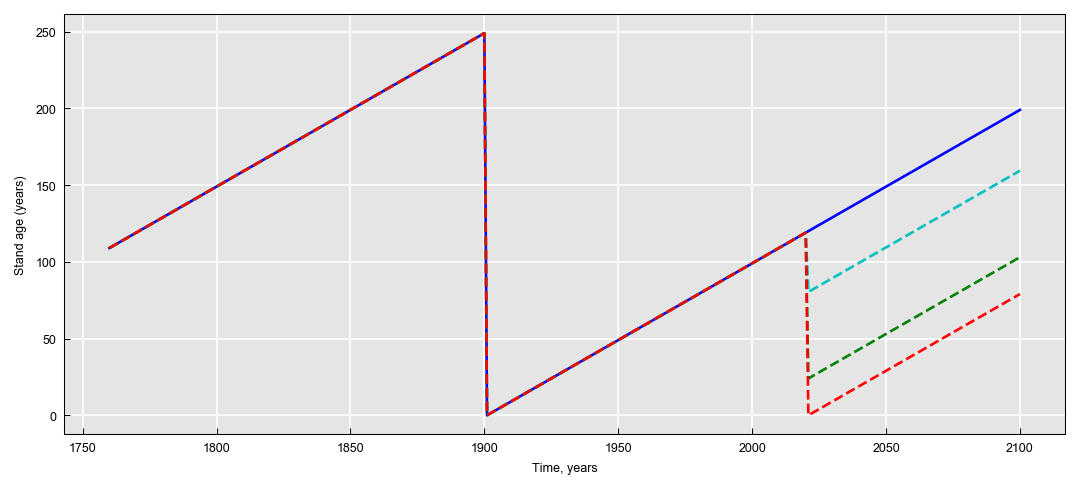

In [19]:
# Plot age
iT=np.where((v2[0]['Year']>=1760) & (v2[0]['Year']<=2100))[0]
fig,ax=plt.subplots(1,figsize=gu.cm2inch(18,8)); lw=1.25
ax.plot(v2[0]['Year'][iT],v1[iP1]['A'][iT,0],'-',color='b',label='P1',linewidth=lw)
ax.plot(v2[0]['Year'][iT],v1[iB1]['A'][iT,0],'--',color='c',label='B1',linewidth=lw)
ax.plot(v2[0]['Year'][iT],v1[iB2]['A'][iT,0],'--',color='g',label='B2',linewidth=lw)
ax.plot(v2[0]['Year'][iT],v1[iB3]['A'][iT,0],'--',color='r',label='B3',linewidth=lw)
ax.set(ylabel='Stand age (years)',xlabel='Time, years');

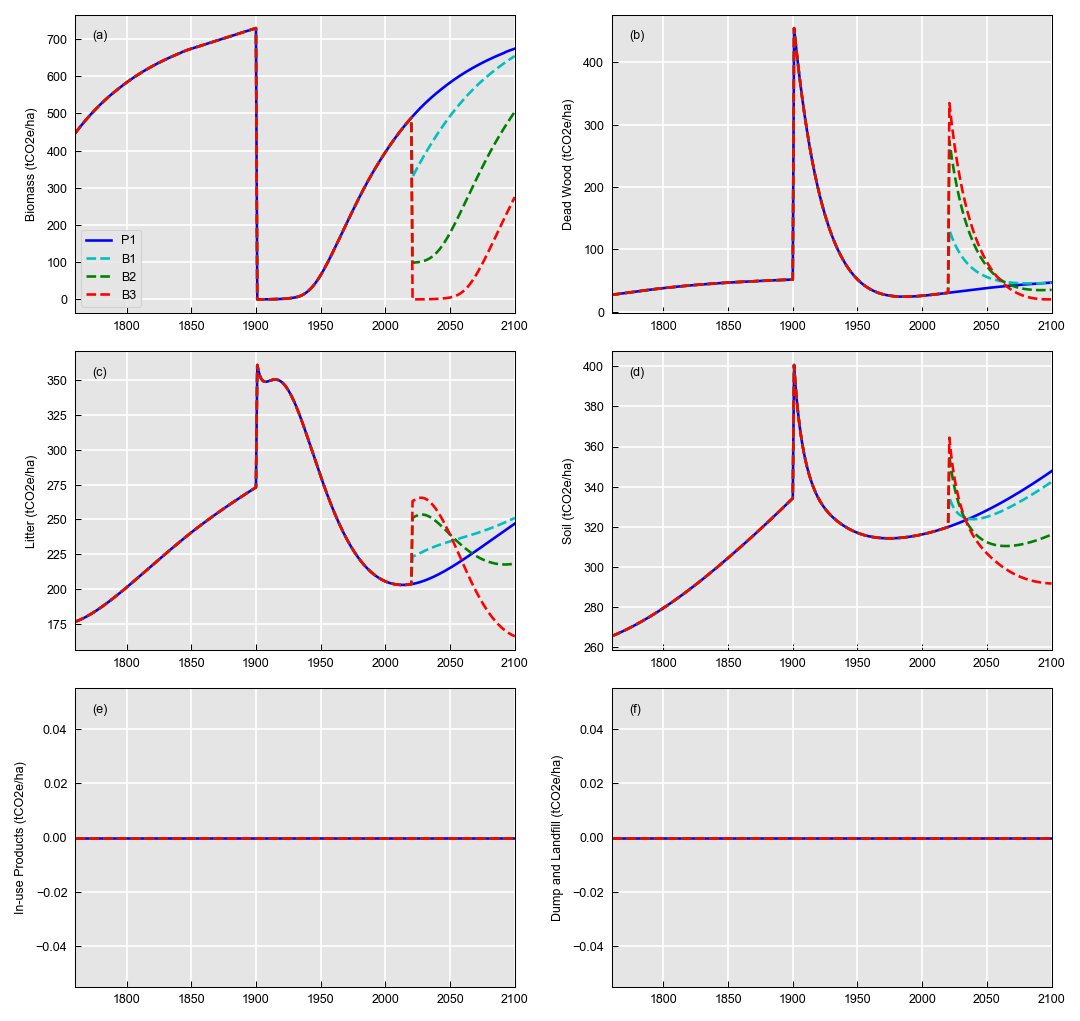

In [20]:
iT=np.where((v2[0]['Year']>=1760) & (v2[0]['Year']<=2100))[0]
vs=['Eco_Biomass','Eco_DeadWood','Eco_Litter','Eco_Soil','Pro_InUse','Pro_DumpLandfill']
vs2=['Biomass','Dead Wood','Litter','Soil','In-use Products','Dump and Landfill']
scn=['Baseline scenario','Project scenario']
cnt=0
fig,ax=plt.subplots(3,2,figsize=gu.cm2inch(18,17)); lw=1.25
for i in range(3):
    for j in range(2):    
        ax[i,j].plot(v2[0]['Year'][iT],v2[iP1][vs[cnt]][iT,0],'-',color='b',label='P1',linewidth=lw)
        ax[i,j].plot(v2[0]['Year'][iT],v2[iB1][vs[cnt]][iT,0],'--',color='c',label='B1',linewidth=lw)
        ax[i,j].plot(v2[0]['Year'][iT],v2[iB2][vs[cnt]][iT,0],'--',color='g',label='B2',linewidth=lw)
        ax[i,j].plot(v2[0]['Year'][iT],v2[iB3][vs[cnt]][iT,0],'--',color='r',label='B3',linewidth=lw)
        ax[i,j].set(ylabel=vs2[cnt] + ' (tCO2e/ha)')
        #ax[i,j].set_ylim(bottom=0,top=600);
        ax[i,j].set_xlim(np.min(v2[0]['Year'][iT]),np.max(v2[0]['Year'][iT]));
        if (i==0) & (j==0):
            ax[i,j].legend(loc="lower left")
        cnt=cnt+1
gu.axletters(ax,plt,0.04,0.92);

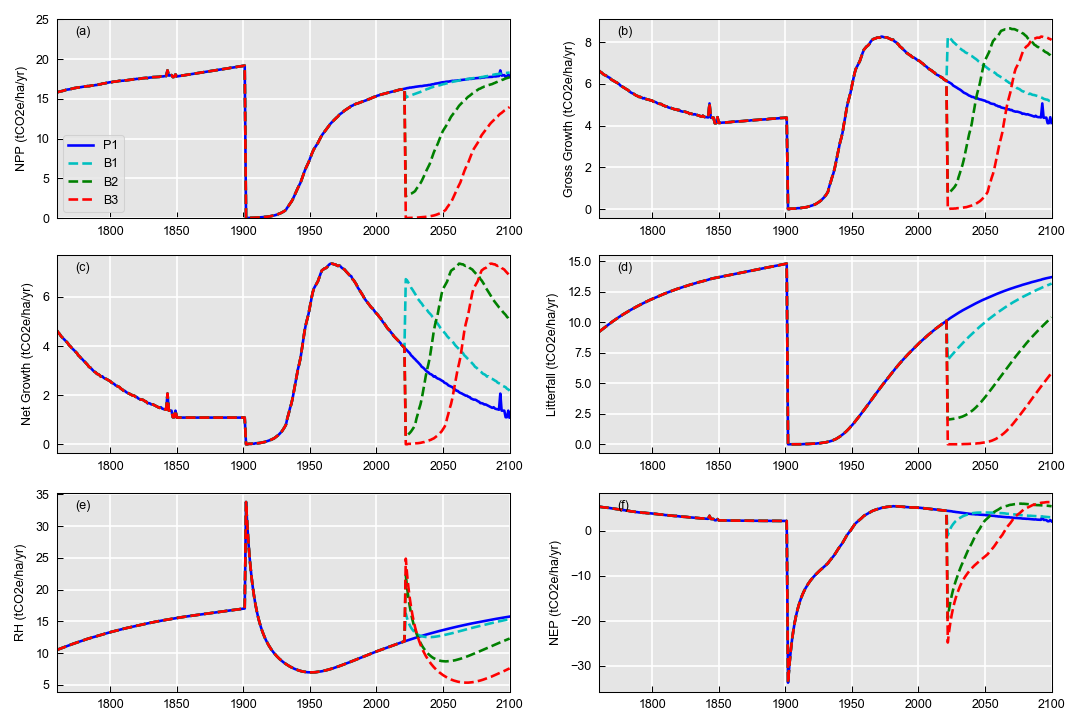

In [21]:
for i in range(4):
    v2[i]['Eco_NEP']=v2[i]['Eco_NPP']-v2[i]['Eco_RH']
    v2[i]['Eco_E_Fire']=v2[i]['Eco_E_Wildfire']+v2[i]['Eco_E_OpenBurning']
vs=['Eco_NPP','Eco_G_Gross','Eco_G_Net','Eco_LF','Eco_RH','Eco_NEP']
vs2=['NPP','Gross Growth','Net Growth','Litterfall','RH','NEP']
cnt=0
fig,ax=plt.subplots(3,2,figsize=gu.cm2inch(18,12))
for i in range(3):
    for j in range(2):
        ax[i,j].plot(v2[0]['Year'][iT],v2[iP1][vs[cnt]][iT,0],'-',color='b',label='P1',linewidth=lw)
        ax[i,j].plot(v2[0]['Year'][iT],v2[iB1][vs[cnt]][iT,0],'--',color='c',label='B1',linewidth=lw)
        ax[i,j].plot(v2[0]['Year'][iT],v2[iB2][vs[cnt]][iT,0],'--',color='g',label='B2',linewidth=lw)
        ax[i,j].plot(v2[0]['Year'][iT],v2[iB3][vs[cnt]][iT,0],'--',color='r',label='B3',linewidth=lw)  
        ax[i,j].set(ylabel=vs2[cnt] + ' (tCO2e/ha/yr)')
        ax[i,j].set_xlim((np.min(v2[0]['Year'][iT]),np.max(v2[0]['Year'][iT])));
        cnt=cnt+1
ax[0,0].legend(loc="lower left")        
ax[0,0].set_ylim(bottom=0,top=25)
gu.axletters(ax,plt,0.04,0.92);

### Response of net sector GHG balance

The annual GHG benefit for a fertilization project is calculated from the difference in net sector GHG balance between the baseline and project sceanrios. Because the annual GHG benefit from fertilization depends strongly on time since fertilization (decreasing abruptly after the 10-year period of stimulation), it make sense to also look at the cumulative GHG benefit in future years in addition to the annual time series of GHG benefit. 

From these results, the initial GHG emissions from operations appear as a negative spike in GHG benefit during the year of fertilization. Operational emissions are then offset by the response of trees for the following ten years.

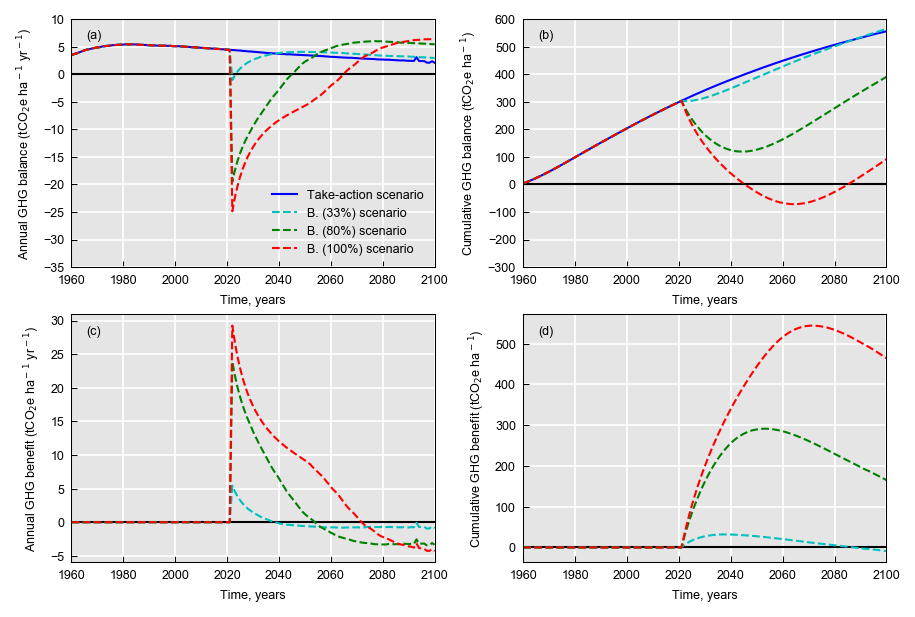

In [23]:
iT=np.where((v2[0]['Year']>=1960) & (v2[0]['Year']<=2100))[0]
fig,ax=plt.subplots(2,2,figsize=gu.cm2inch(15,10)); lw=1;
ax[0,0].plot(v2[0]['Year'][iT],0*np.ones(iT.size),'-',linewidth=1,color=(0,0,0))
ax[0,0].plot(v2[0]['Year'][iT],v2[iP1]['Sec_NGHGB'][iT],'-',color='b',label='Take-action scenario',linewidth=lw)
ax[0,0].plot(v2[0]['Year'][iT],v2[iB1]['Sec_NGHGB'][iT],'--',color='c',label='B. (33%) scenario',linewidth=lw)
ax[0,0].plot(v2[0]['Year'][iT],v2[iB2]['Sec_NGHGB'][iT],'--',color='g',label='B. (80%) scenario',linewidth=lw)
ax[0,0].plot(v2[0]['Year'][iT],v2[iB3]['Sec_NGHGB'][iT],'--',color='r',label='B. (100%) scenario',linewidth=lw)
ax[0,0].legend(loc="lower right",frameon=False,facecolor='white')
ax[0,0].set(position=[0.06,0.57,0.41,0.42],xlim=[np.min(v2[0]['Year'][iT]),np.max(v2[0]['Year'][iT])],ylim=[-35,10],xlabel='Time, years',ylabel=r'Annual GHG balance (tCO$_2$e ha$^-$$^1$ yr$^-$$^1$)');

ax[0,1].plot(v2[0]['Year'][iT],0*np.ones(iT.size),'-',linewidth=1,color=(0,0,0))
ax[0,1].plot(v2[0]['Year'][iT],np.cumsum(v2[iP1]['Sec_NGHGB'][iT]),'-',color='b',label='',linewidth=lw)
ax[0,1].plot(v2[0]['Year'][iT],np.cumsum(v2[iB1]['Sec_NGHGB'][iT]),'--',color='c',label='',linewidth=lw)
ax[0,1].plot(v2[0]['Year'][iT],np.cumsum(v2[iB2]['Sec_NGHGB'][iT]),'--',color='g',label='B2',linewidth=lw)
ax[0,1].plot(v2[0]['Year'][iT],np.cumsum(v2[iB3]['Sec_NGHGB'][iT]),'--',color='r',label='B3',linewidth=lw)
ax[0,1].set(position=[0.57,0.57,0.41,0.42],xlim=[np.min(v2[0]['Year'][iT]),np.max(v2[0]['Year'][iT])],ylim=[-300,600],xlabel='Time, years',ylabel=r'Cumulative GHG balance (tCO$_2$e ha$^-$$^1$)');

ax[1,0].plot(v2[0]['Year'][iT],0*np.ones(iT.size),'-',linewidth=1,color=(0,0,0))
ax[1,0].plot(v2[0]['Year'][iT],v2[iP1]['Sec_NGHGB'][iT]-v2[iB1]['Sec_NGHGB'][iT],'--',linewidth=lw,color='c',label='Delta NSCB (P1 minus B1)')
ax[1,0].plot(v2[0]['Year'][iT],v2[iP1]['Sec_NGHGB'][iT]-v2[iB2]['Sec_NGHGB'][iT],'--',linewidth=lw,color='g',label='Delta NSCB (P1 minus B1)')
ax[1,0].plot(v2[0]['Year'][iT],v2[iP1]['Sec_NGHGB'][iT]-v2[iB3]['Sec_NGHGB'][iT],'--',linewidth=lw,color='r',label='Delta NSCB (P1 minus B1)')
ax[1,0].set(position=[0.06,0.07,0.41,0.42],xlim=[np.min(v2[0]['Year'][iT]),np.max(v2[0]['Year'][iT])],xlabel='Time, years',ylabel=r'Annual GHG benefit (tCO$_2$e ha$^-$$^1$ yr$^-$$^1$)');

ax[1,1].plot(v2[0]['Year'][iT],0*np.ones(iT.size),'-',linewidth=1,color=(0,0,0))
ax[1,1].plot(v2[0]['Year'][iT],np.cumsum(v2[iP1]['Sec_NGHGB'][iT])-np.cumsum(v2[iB1]['Sec_NGHGB'][iT]),'--',color='c',linewidth=lw,label='Delta cumulative NSCB (P1 0 B1)')
ax[1,1].plot(v2[0]['Year'][iT],np.cumsum(v2[iP1]['Sec_NGHGB'][iT])-np.cumsum(v2[iB2]['Sec_NGHGB'][iT]),'--',color='g',linewidth=lw,label='Delta cumulative NSCB (P1 0 B1)')
ax[1,1].plot(v2[0]['Year'][iT],np.cumsum(v2[iP1]['Sec_NGHGB'][iT])-np.cumsum(v2[iB3]['Sec_NGHGB'][iT]),'--',color='r',linewidth=lw,label='Delta cumulative NSCB (P1 0 B1)')
ax[1,1].set(position=[0.57,0.07,0.41,0.42],xlim=[np.min(v2[0]['Year'][iT]),np.max(v2[0]['Year'][iT])],xlabel='Time, years',ylabel=r'Cumulative GHG benefit (tCO$_2$e ha$^-$$^1$)');
gu.axletters(ax,plt,0.04,0.92)
#fig.suptitle('Figure 2. Net sector GHG balance and GHG benefit for the coastal site.');
gu.PrintFig(meta['Paths']['Figures'] + '\\GHG Balance','png',900);

## Summary of GHG Benefit for Coastal and Interior Examples

Finally, let's summarize the GHG benefit for both site examples, and with and without future harvesting. We will just focus on reporting the cumulative 2050 time horizon. Also reported is the mitigation cost, assuming a projected cost of fertilization of $538/ha.

In [16]:
it1=np.where( (v2[0]['Year']>=2020) & (v2[0]['Year']<=2050) )[0]

ghgb=np.array([np.sum(v2[iP1]['Sec_NGHGB'][it1,0])-np.sum(v2[iB1]['Sec_NGHGB'][it1,0]),
               np.sum(v2[iP1]['Sec_NGHGB'][it1,0])-np.sum(v2[iB2]['Sec_NGHGB'][it1,0]),
               np.sum(v2[iP1]['Sec_NGHGB'][it1,0])-np.sum(v2[iB3]['Sec_NGHGB'][it1,0])])

# Dec 16, 2020 (email from Brian, consulted with Marnie)
cost=42.37

df=pd.DataFrame(columns=['Variable','B1 (33% mort)','B2 (80% mort)','B3 (100% mort)'])
df['Variable']=['GHG Benefit (tCO2e/ha)','Cost ($/ha)','Mitigation cost ($/tCO2e)']
df['B1 (33% mort)']=[int(ghgb[0]),cost,cost/ghgb[0]]
df['B2 (80% mort)']=[int(ghgb[1]),cost,cost/ghgb[1]]
df['B3 (100% mort)']=[int(ghgb[2]),cost,cost/ghgb[2]]
df=df.round(2)
df

,Variable,B1 (33% mort),B2 (80% mort),B3 (100% mort)
0,GHG Benefit (tCO2e/ha),27.00,289.00,444.00
1,Cost ($/ha),42.37,42.37,42.37
2,Mitigation cost ($/tCO2e),1.54,0.15,0.10


In [17]:
# Save time series for entry as committed project in Admin table
pthout=r'Z:\!Workgrp\Forest Carbon\Forest Carbon Initiative\Eligibility Assessments\20201116_FCI_EA_HemlockLooper\OutputForFCIDB2.xlsx'

ghg_bal_p=v2[iP1]['Sec_NGHGB'][:,0]
ghg_bal_b=v2[iB2]['Sec_NGHGB'][:,0]

ghgb=ghg_bal_p-ghg_bal_b

y=np.column_stack((v2[iP1]['Year'],ghg_bal_b,ghg_bal_p,ghgb))

df=pd.DataFrame(y,columns=['Time','GHG balance Baseline (tCO2e/ha/yr)','GHG balance Project (tCO2e/ha/yr)','GHG benefit (tCO2e/ha/yr)'])
df.to_excel(pthout,index=False)

FileCreateError: [Errno 2] No such file or directory: 'Z:\\!Workgrp\\Forest Carbon\\Forest Carbon Initiative\\Eligibility Assessments\\20201116_FCI_EA_HemlockLooper\\OutputForFCIDB2.xlsx'

## Acknowledgements

This work was supported by Canada's Low Carbon Economy Leadership Fund (https://www.canada.ca/en/environment-climate-change/services/climate-change/low-carbon-economy-fund.html).